# LightGBM

LightGBMはMicrosoftが開発した勾配ブースティングフレームワークです。特徴としては、大規模データセットの高速処理が可能で、低メモリ消費、高い効率、カテゴリーデータのネイティブサポートなどがあります。また、GPUのサポートも提供し、精度の向上を図りつつ計算時間を大幅に削減できる点が際立っています。

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/tabledata/regression/LightGBM.ipynb)

In [ ]:
!pip install lightgbm==4.0.0

In [2]:
import lightgbm as lgb

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

#### データの用意

In [3]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = pd.Series(california.target, name='MedHouseVal')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### LightGBMの学習

In [4]:
x = df.drop('target', axis = 1)
y = df['target']


x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.2, random_state=4)

categorical_features = []
lgb_train = lgb.Dataset(x_train,y_train,categorical_feature=categorical_features,free_raw_data=False)
lgb_eval = lgb.Dataset(x_valid,y_valid,reference=lgb_train,categorical_feature=categorical_features,free_raw_data=False)

In [5]:
#ハイパーパラメータを設定
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'}, 
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'vervose': 0
}

#LightGBMの学習
model = lgb.train(params,lgb_train,
                 valid_sets=[lgb_train,lgb_eval],
                 num_boost_round=1000
                 )

#最もスコアの良いモデル
optimum_boost_rounds = model.best_iteration


[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Info] Start training from score 2.069673


#### 予測

In [6]:
y_pred = model.predict(x_valid,num_interation=model.best_iteration)
y_pred

[LightGBM] [Warning] Unknown parameter: num_interation


array([1.63053198, 2.73510878, 1.08259384, ..., 2.51167758, 1.98544688,
       1.11396303])

#### 特徴量重要度

In [7]:
importance = pd.DataFrame(model.feature_importance(importance_type = 'split'),index = x.columns,columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
Latitude,7050
Longitude,7019
AveOccup,6660
MedInc,6224
Population,6047
AveBedrms,5786
AveRooms,5684
HouseAge,4530


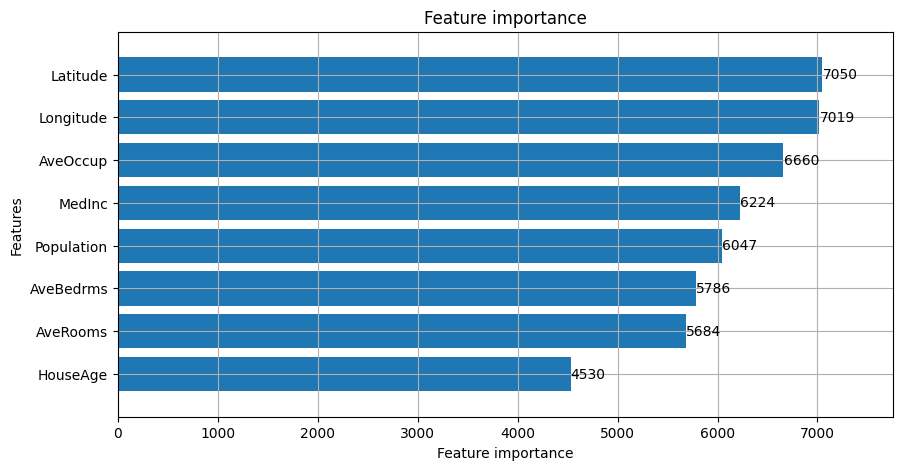

In [8]:
lgb.plot_importance(model, height = 0.8 ,figsize = (10,5),importance_type='split',)
plt.show()

In [9]:
importance = pd.DataFrame(model.feature_importance(importance_type = 'gain'),index = x.columns,columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
MedInc,75686.424117
Longitude,26222.021756
Latitude,26142.569731
AveOccup,23833.304174
AveRooms,14191.831534
HouseAge,8667.193833
AveBedrms,5865.249061
Population,4522.277411


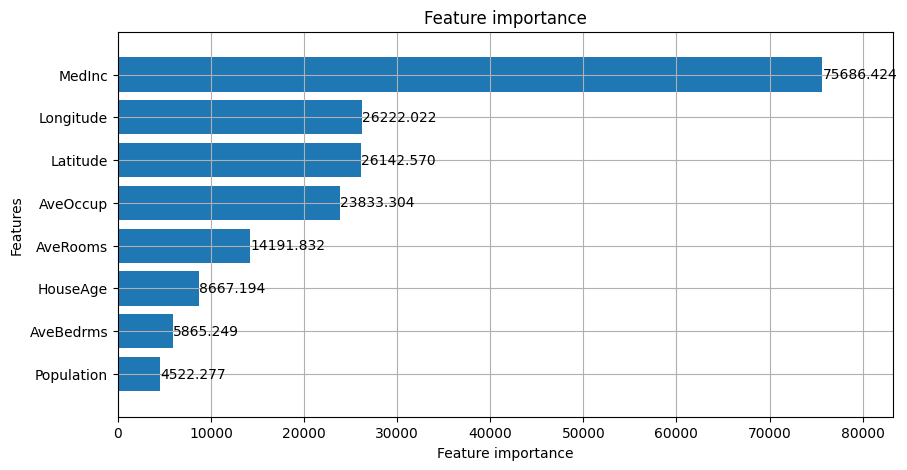

In [10]:
lgb.plot_importance(model, height = 0.8 ,figsize = (10,5),importance_type='gain',)
plt.show()